# Using NDBC Data

This notebook introduces National Data Buoy Center (NDBC) data with a focus on buoys in Southern Lake Michigan.

>[The mission of the NOAA's NDBC is to collect and disseminate in-situ, real-time, quality-controlled observations in the marine environment to ensure the Nation's maritime safety, and to understand and predict the atmosphere, ocean, waves, ice, and climate.](https://www.ndbc.noaa.gov/faq/ndbc.shtml) 

The NDBC provids both station metadata and station measurements. NDBC data and guides and explanations of the data can be found on the NDBC web site. 

- [National Data Buoy Center](https://www.ndbc.noaa.gov/)
- [NDBC Web Data Guide](https://www.ndbc.noaa.gov/docs/ndbc_web_data_guide.pdf)
- [Measurement Description and Units](https://www.ndbc.noaa.gov/faq/measdes.shtml)
- [Station List](https://www.ndbc.noaa.gov/to_station.shtml)
- [Realtime data from the last 45 days](https://www.ndbc.noaa.gov/data/realtime2/)
- [Historical Data](https://www.ndbc.noaa.gov/station_page.php?station=45174), example for station 45174

The Standard Meteorological data may include:

- *WDIR* &nbsp; Wind direction
- *WSPD* &nbsp; Wind speed (m/s) averaged over an eight-minute period for buoys and a two-minute period for land stations. 
- *GWS* &nbsp; Peak 5 or 8 second wind gusts speed (m/s).
- *WVHT* &nbsp; Significant wave height (m)
- *DPD* &nbsp; Dominant wave period (s)
- *APD* &nbsp; Average wave period (s)
- *PRES* &nbsp; Sea level pressure (hPa)
- *ATMP* &nbsp; Air temperature (Celsius)
- *WTMP* &nbsp; Water temperature (Celsius)
- *DEWP* &nbsp; Dewpoint

Solar Radiation data may include:

- *SRAD1* &nbsp; Shortwave Radiation, LI-COR LI-200 pyronometer sensor, $0.1$-$2~\mu{\rm m}$ ``solar'' (${\rm W}/{\rm m}^2$)
- *SWRAD* &nbsp; Shortwave Radiation, Eppley Precision Spectral Pyranometer, $0.1$-$2~\mu{\rm m}$ ``solar'' (${\rm W}/{\rm m}^2$)
- *LWRAD* &nbsp; Longwave Radiation, Eppley PIR Precision Infrared Radiometer, IR from the Earth and atmosphere, $5$-$25~\mu{\rm m}$  (${\rm W}/{\rm m}^2$)

See the [Measurement Description and Units](https://www.ndbc.noaa.gov/faq/measdes.shtml) link for more information.



The NDBC web interface is an easy way to identify stations.  They Southern Lake Michigan buoy list below was fine-tuned using this site which is linked in the image below.

[![NDC Screenshot](images/ndbc_screenshot.png)](https://www.ndbc.noaa.gov)

### Southern Lake Michigan Buoys 

This list of Southern Lake Michigan Buoys was constructed from the NDBC web site https://www.ndbc.noaa.gov/, five of these stations appear to be deactivated. The *five digit station identifiers* below are needed for API calls to return station data.

| Identifier | Name/Location | Type | Owner |  Measurements |
|------------| ---------| ---------| --------- | -------- |
| **KNSW3** | Kenosha Light, Kenosha, WI | fixed | NWS | WDIR, WSPD, GST, PRES, ATMP|
| 45187 | Winthrop Harbor | buoy | UIUC| WDIR, WSPD, GST, WVHT, MWD, ATMP, WTMP |
| 45186 | Waukegan Buoy | buoy | UIUC | WDIR, WSPD, GST, WVHT, DPD, ATMP, WTMP |
| **WHRI2** | Waukegan Harbor, IL | fixed | NWS | WDIR, WSPD, GST, ATMP |
| 45174 |Wilmette Buoy | buoy |  IL-IN Sea Grant| WDIR, WSPD, GST, WVHT, DPD, MWD, PRES, ATMP, WTMP, DEWP: ~~SRAD1~~ |
| ~~FSTI2~~ |~~Foster Ave, Chicago, IL~~ | fixed| ~~CPD~~ | ATMP data ends in 2021 |
| **OKSI2** | Oak St., Chicago, IL | fixed | CPD | WDIR, WSPD, GST, ATMP: SRAD1 |
| **CHII2** | Harrison-Dever Crib, Chicago, IL | fixed | GLERL | WDIR, WSPD, GST, ATMP, DEWP |
| ~~45177~~| ~~Ohio St. Beach, Chicago, IL~~ | buoy | ~~CPD~~ | WVHT, DPD, WTMP, last data 2019 |
| 45198 | Chicago Buoy | buoy |IN-IL Sea Grant |  WDIR, WSPD, GST, WVHT, DPD, WMD, WTMP |
| **CNII2** | Northerly Isle, IL | fixed | NWS | WDIR, WSPD, GST, ATMP, DEWP |
| ~~JAKI2~~ | ~~63rd St. Chicago, IL~~ | fixed| ~~CPD~~| data ends in 2022 |
| **CMTI2** | Caulument Harbor, IL | fixed| NOAA | WDIR, WSPD, GST, PRES, ATMP, DEWP|
| **BHRI3** | Burns Harbor, IN | fixed |  NWS | WDIR, WSPD, GST, PRES, ATMP|
| 45170 | Michigan City Buoy, IN | buoy | IL-IN Sea Grant| WDIR, WSPD, GST, WVHT, DPD, WMD, PRES, ATMP, DEWP: SRAD1 |
| MCYI3 | Michigan City Harbor Entrance | fixed | GLERL | WDIR, WSPD, GST, PRES, ATMP, DEWP |
| ~~**18CI3**~~ |~~Michigan City CG Station~~ | fixed | ~~USCG~~ | last data 2015 | 
| 45026 |Cook Nuclear Plant Buoy, Stevensville, MI | buoy | Limno Tech | WDIR, WSPD, GST, WVHT, DPD, WMD, PRES, ATMP, WTMP, DEWP: ~~SRAD1~~|
| ~~20CM4~~ | ~~ST. Joseph CG Station, MI~~ | fixed| ~~USCG~~ | last data 2015|
| **SJOM4** |St. Joseph, MI | fixed| NWS | WDIR, WSPD, GST, PRES, ATMP| 
| 45168 | South Haven Buoy, MI| buoy | Limno Tech| WDIR, WSPD, GST, WVHT, DPD, WMD, WTMP,DEWP |
| *SVNM4* | South Haven Light, MI| fixed | GLERL | WDIR, WSPD, GST, ATMP |

Station's with IDs in **boldface** collect data all year. This most of the *fixed* station.

## Exploring the NDBC with Python 

In [15]:
# Import standard python libraries
import numpy as np            # Numerical Python: scientific 
import pandas as pd           # tabular data and timeseries package
import matplotlib.pyplot as plt
import datetime as dt 
from io import StringIO

### Active stations

Import a list of *active* stations directly from the NDBC as a Data Frame. 

In [17]:
active_st = pd.read_xml(path_or_buffer="https://www.ndbc.noaa.gov/activestations.xml")
station_md = pd.read_xml(path_or_buffer="https://www.ndbc.noaa.gov/metadata/stationmetadata.xml")

In [24]:
print(station_md.shape)
display(station_md)
print(active_st[(active_st['id']=='CHII2'.lower())])
print(station_md[(station_md['id']=='CHII2'.upper())])

(1436, 6)


,id,name,owner,pgm,type,history
0,0Y2W3,"Sturgeon Bay CG Station, WI",U.S.C.G. Marine Reporting Stations,IOOS Partners,fixed,NaN
1,1801589,"SD 1073 - 24 NM SSW of San Francisco, CA (Site...",NDBC,NDBC Meteorological/Ocean,other,NaN
2,18CI3,"Michigan City CG Station, IN",U.S.C.G. Marine Reporting Stations,IOOS Partners,fixed,NaN
3,20CM4,"St. Joseph CG Station, MI",U.S.C.G. Marine Reporting Stations,IOOS Partners,fixed,NaN
4,21346,"21346 380km East of Iwate, Japan",Japanese Meteorological Agency,Tsunami,dart,NaN
...,...,...,...,...,...,...
1431,YGNN6,"Niagara Coast Guard Station, NY",NWS Eastern Region,IOOS Partners,fixed,NaN
1432,YKRV2,"8637611 - York River East Rear Range Light, VA",NOAA NOS PORTS,NOS/CO-OPS,fixed,NaN
1433,YKTV2,"8637689 - Yorktown USCG Training Center, VA",NOS,NOS/CO-OPS,fixed,NaN
1434,YRSV2,"Taskinas Creek, Chesapeake Bay Reserve, VA",National Estuarine Research Reserve System,NERRS,fixed,NaN


        id     lat     lon   elev                              name  owner  \
696  chii2  41.916 -87.572  176.0  Harrison-Dever Crib, Chicago, IL  GLERL   

               pgm   type met currents waterquality dart  seq  
696  IOOS Partners  fixed   y        n            n    n  NaN  
        id                              name  owner            pgm   type  \
738  CHII2  Harrison-Dever Crib, Chicago, IL  GLERL  IOOS Partners  fixed   

     history  
738      NaN  


#### Southern Lake Michigan Buoys 

Create a subset of South Lake Michigan buoys based on a geographical bounding box. NB, the *five digit station identifiers* in this list are lower case.  The [NBDC search engine](https://www.ndbc.noaa.gov/station_page.php?)
is not case sensitive, but various NDBC filenames use both lower and uppercase station IDs. The external package
API calls to return station data used below required upper case station identifiers.

In [ ]:
mask = ((active_st['lat'] > 41.5) & (active_st['lat'] < 42.6)  & (active_st['lon'] < -84.7) & (active_st['lon'] > -88))
slm_buoys = active_st.loc[mask]
print(slm_buoys.shape)
#display(slm_buoys)

Remove columns we won't use. By inspection, some of the stations on the "active" list have not collected data in recent years.  Remove those stattions.

In [5]:
slm_buoys = slm_buoys.drop(['seq','dart','waterquality','currents','pgm'],axis=1)

slm_buoys = (slm_buoys[(slm_buoys.id != "FSTI2") & (slm_buoys.id != "fsti2")]) #  Data collection ended in 2021
slm_buoys = slm_buoys[slm_buoys.id != "45177" ]                                #  Data collection ended in 2019
slm_buoys = slm_buoys[(slm_buoys.id != "JAKI2") & (slm_buoys.id != "jaki2") ]  #  Data collection ended in 2022
slm_buoys = slm_buoys[(slm_buoys.id != "18CI3") & (slm_buoys.id != "18ci3") ]  #  Data collection ended in 2015
slm_buoys = slm_buoys[(slm_buoys.id != "20CM4") & (slm_buoys.id != "20cm4")]   #  Data collection ended in 2015
slm_buoys.reset_index(inplace = True)

In [6]:
print(slm_buoys.shape)
slm_buoys.reset_index(drop=True,inplace=True)
display(slm_buoys)

slm_buoys.to_csv(r'data/slm_buoys.txt', header=None, index=None, sep=' ', mode='a')
station_list = slm_buoys['id'].tolist()
print(station_list)

(17, 9)


,index,id,lat,lon,elev,name,owner,type,met
0,256,45026,41.982,-86.619,176.0,"Cook Nuclear Plant Buoy, Stevensville, MI",Limno Tech,buoy,n
1,286,45168,42.397,-86.331,177.0,"South Haven Buoy, MI",Limno Tech,buoy,n
2,288,45170,41.755,-86.968,177.0,"Michigan City Buoy, IN",Illinois-Indiana Sea Grant and Purdue Civil En...,buoy,n
3,292,45174,42.135,-87.655,176.0,"Wilmette Buoy, IL",llinois-Indiana Sea Grant,buoy,n
4,302,45186,42.368,-87.795,176.0,"Waukegan Buoy, IL",University of Illinois at Urbana-Champaign,buoy,n
5,303,45187,42.491,-87.779,176.0,"Winthrop Harbor Buoy, IL",University of Illinois at Urbana-Champaign,buoy,n
6,308,45198,41.892,-87.563,176.0,Chicago Buoy,Illinois-Indiana Sea Grant and Purdue Civil En...,buoy,n
7,647,bhri3,41.646,-87.147,180.0,"Burns Harbor, IN",NWS Central Region,fixed,y
8,696,chii2,41.916,-87.572,176.0,"Harrison-Dever Crib, Chicago, IL",GLERL,fixed,y
9,711,cmti2,41.730,-87.538,178.5,"9087044 - Calumet Harbor, IL",NOS,fixed,y


['45026', '45168', '45170', '45174', '45186', '45187', '45198', 'bhri3', 'chii2', 'cmti2', 'cnii2', 'knsw3', 'mcyi3', 'oksi2', 'sjom4', 'svnm4', 'whri2']


met: indicates whether the station has reported meteorological data in the past eight hours (y/n).

## Realtime Meteorological Data

NDBC realtime data is from the last 45 days. In contrast to historic data, filenames for the reatime data uses station IDs in upper case. 

In [7]:
# Create a function to fetch and wrangle realtime data. 

def get_rt_metdata(station):
    
    url = 'https://www.ndbc.noaa.gov/data/realtime2/' + station.upper() + '.txt'
    df = pd.read_table(url,sep = "\s+")
    # Wrangle the Buoy Data
    units = df.loc[0]
    df.drop(df.index[0], inplace=True)
    # Set the column types
    df['#YY'] = df['#YY'].astype(int)
    df['MM'] = df['MM'].astype(int)
    df['DD'] = df['DD'].astype(int)
    df['hh'] = df['hh'].astype(int)
    df['mm'] = df['mm'].astype(int)
    if 'WDIR' in df.columns:
        df['WDIR'] = pd.to_numeric(df['WDIR'], errors='coerce')
    if 'WSPD' in df.columns:
        df['WSPD'] = pd.to_numeric(df['WSPD'], errors='coerce')
    if 'GST' in df.columns:
        df['GST'] = pd.to_numeric(df['GST'], errors='coerce')
    if 'WVHT' in df.columns:
        df['WVHT'] = pd.to_numeric(df['WVHT'], errors='coerce')
    if 'DPD' in df.columns:
        df['DPD'] = pd.to_numeric(df['DPD'], errors='coerce')
    if 'APD' in df.columns:
        df['APD'] = pd.to_numeric(df['APD'], errors='coerce')
    if 'MWD' in df.columns:
        df['MWD'] = pd.to_numeric(df['MWD'], errors='coerce')
    if 'PRES' in df.columns:
        df['PRES'] = pd.to_numeric(df['PRES'], errors='coerce')
    if 'ATMP' in df.columns:
        df['ATMP'] = pd.to_numeric(df['ATMP'], errors='coerce')
    if 'WTMP' in df.columns:
        df['WTMP'] = pd.to_numeric(df['WTMP'], errors='coerce')
    if 'DEWP' in df.columns:
        df['DEWP'] = pd.to_numeric(df['DEWP'], errors='coerce')
    if 'VIS' in df.columns:
        df['VIS'] = pd.to_numeric(df['VIS'], errors='coerce')
    if 'TIDE' in df.columns:
        df['TIDE'] = pd.to_numeric(df['TIDE'], errors='coerce')
    if 'PTDY' in df.columns:
        df['PTDY'] = pd.to_numeric(df['PTDY'], errors='coerce')

    df['datetime'] = pd.to_datetime(dict(year=df['#YY'], month=df.MM,  day = df.DD, hour=df.hh, minute=df.mm))
    df.set_index('datetime',inplace=True)
    return (df)

### Realtime data for the Harrison-Dever Crib (CHII2)

In [51]:
rtdf = get_rt_metdata('CHII2')
StationName = slm_buoys.loc[slm_buoys['id'] == 'chii2','name'].iloc[0]
print(StationName)
print(rtdf.head())

Harrison-Dever Crib, Chicago, IL
                      #YY  MM  DD  hh  mm   WDIR  WSPD  GST  WVHT  DPD  APD  \
datetime                                                                      
2024-03-04 14:00:00  2024   3   4  14   0  180.0   3.6  4.1   NaN  NaN  NaN   
2024-03-04 13:50:00  2024   3   4  13  50  190.0   5.1  5.1   NaN  NaN  NaN   
2024-03-04 13:40:00  2024   3   4  13  40  190.0   5.1  5.1   NaN  NaN  NaN   
2024-03-04 13:30:00  2024   3   4  13  30  190.0   4.6  5.1   NaN  NaN  NaN   
2024-03-04 13:20:00  2024   3   4  13  20  190.0   4.1  4.1   NaN  NaN  NaN   

                     MWD  PRES  ATMP  WTMP  DEWP  VIS  PTDY  TIDE  
datetime                                                           
2024-03-04 14:00:00  NaN   NaN  12.0   NaN  11.8  NaN   NaN   NaN  
2024-03-04 13:50:00  NaN   NaN  12.3   NaN  12.0  NaN   NaN   NaN  
2024-03-04 13:40:00  NaN   NaN  12.9   NaN  12.3  NaN   NaN   NaN  
2024-03-04 13:30:00  NaN   NaN  11.3   NaN  11.3  NaN   NaN   NaN  
2024-

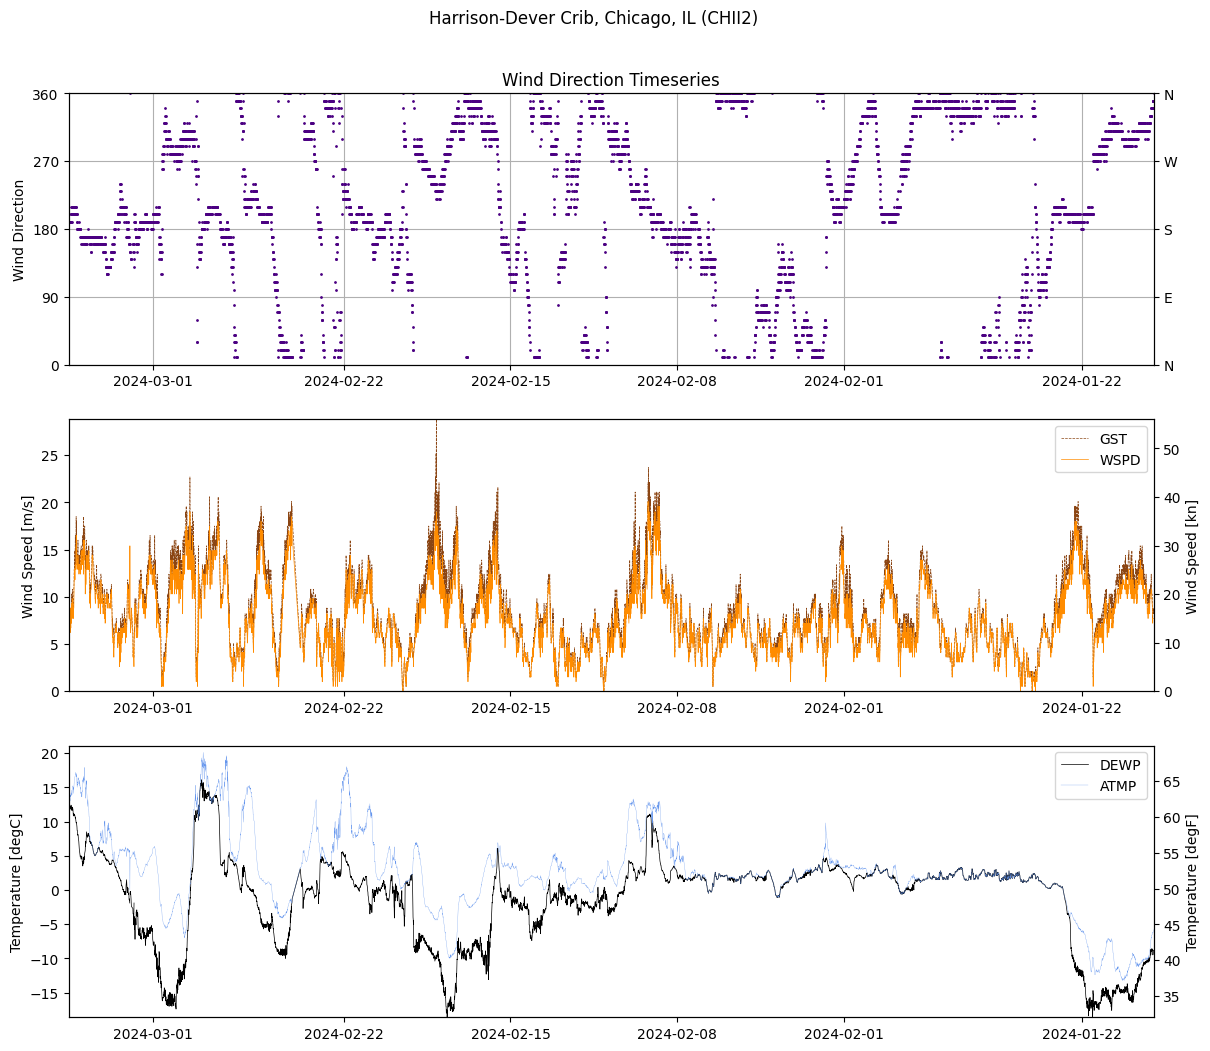

In [37]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

pad = 1.05
my_ytick_labels=['N','E','S','W','N']

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))
#fig.suptitle(StationName,y=0.99)
fig.suptitle(StationName+" (CHII2)",y=0.95)

ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()

ax1.grid(True)
ax1.axis([rtdf.first_valid_index(),rtdf.last_valid_index(),0,360])
major_angle_ticks = np.arange(0,361,90)
ax1.set_yticks(major_angle_ticks)
ax1b.set_yticks(major_angle_ticks)
ax1.plot(rtdf.index, rtdf['WDIR'], 
         color='indigo',
         linestyle='none',
         marker='o',
         markersize=1,
         linewidth=1)
ax1.set_ylabel('Wind Direction')
ax1b.set_yticks(ticks=major_angle_ticks,labels=my_ytick_labels)
#ax1.set_xlabel('Time (UTC)')
ax1.set_title('Wind Direction Timeseries')

# Wind speed, gust, direction
ax2.axis([rtdf.first_valid_index(),rtdf.last_valid_index(),0,rtdf['GST'].max()])
ax2b.axis([rtdf.first_valid_index(),rtdf.last_valid_index(),0,1.9438*rtdf['GST'].max()])
ax2.plot(rtdf.index, rtdf['GST'], 
         color='saddlebrown',  
         linewidth=0.5,
         linestyle='--',
         label='GST')
ax2.plot(rtdf.index, rtdf['WSPD'], 
         color='darkorange',
          linewidth=0.5,
          label='WSPD')
ax2.set_ylabel('Wind Speed [m/s]')
ax2b.set_ylabel('Wind Speed [kn]')
ax2.legend(loc='upper right')

# Temperature

ax3.axis([rtdf.first_valid_index(),rtdf.last_valid_index(),rtdf['DEWP'].min(),pad*rtdf['ATMP'].max()])
ax3b.axis([rtdf.first_valid_index(),rtdf.last_valid_index(),32,pad*9*rtdf['ATMP'].max()/5 +32])
ax3.plot(rtdf.index, rtdf['DEWP'],  
         linewidth=0.5,
         color='black',
         label='DEWP')
ax3.plot(rtdf.index, rtdf['ATMP'], 
         linewidth=0.2,
         color='cornflowerblue',
         label='ATMP')
ax3.set_ylabel('Temperature [degC]')
ax3b.set_ylabel('Temperature [degF]')
ax3.legend(loc='upper right')

plt.savefig('images/realtime.pdf')
plt.show()

Distribution of Wind Speeds

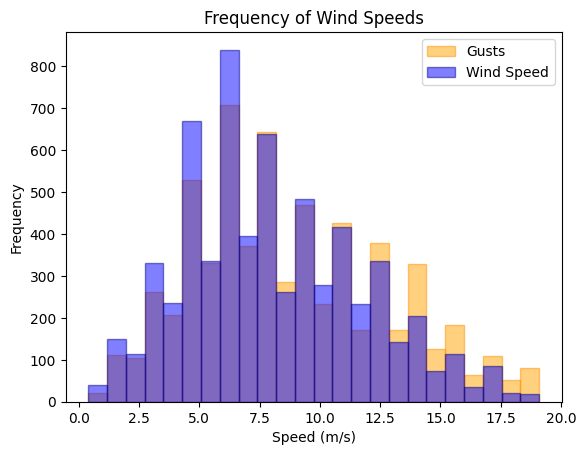

In [52]:
import matplotlib.pyplot as plt
bins = np.linspace(start=0,stop=df["GST"].max(),num=25)  # return evenly spaced numbers over an interval
plt.hist(rtdf["GST"],bins, alpha=0.5, label="Gusts",color='orange',edgecolor='darkorange',align='right')
plt.hist(rtdf["WSPD"],bins, alpha=0.5, label="Wind Speed",color='blue',edgecolor='darkblue',align='right')
plt.legend(loc='upper right')
plt.xlabel('Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Frequency of Wind Speeds')
plt.show()

Text(0.5, 1.02, 'Harrison-Dever Crib, Chicago, IL (45174)')

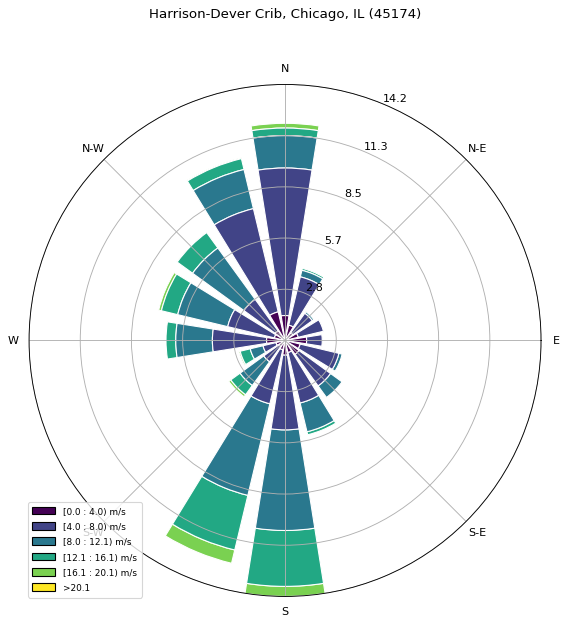

In [53]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(rtdf["WDIR"], rtdf['WSPD'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend(units="m/s")
plt.suptitle(StationName + " (45174)",y=1.02)


## Historial NDBC Data

The top level directory or historical ndbc data is https://www.ndbc.noaa.gov/data/historical/.
Standard meteoroligical data (smet) if found in the directory https://www.ndbc.noaa.gov/data/historical/stdmet/, while standard radiation data is found in https://www.ndbc.noaa.gov/data/historical/srad/

Unlike reatime data, the filenames for historic data contain station IDs in lower case. The data is stored in separate files for each year.

https://www.ndbc.noaa.gov/view_text_file.php?filename=chii2h2023.txt.gz&dir=data/historical/stdmet/
https://www.ndbc.noaa.gov/data/historical/stdmet/chii2h2023.txt.gz



In [42]:

def get_hdata(station,year):

    url = 'https://www.ndbc.noaa.gov/data/historical/stdmet/' + station.lower() + 'h' + str(year) + '.txt.gz'
    df = pd.read_table(url,sep = "\s+",compression='gzip',low_memory=False)
    # Wrangle the Buoy Data
    units = df.loc[0]
    df.drop(df.index[0], inplace=True)
    # Set the column types
    df['#YY'] = df['#YY'].astype(int)
    df['MM'] = df['MM'].astype(int)
    df['DD'] = df['DD'].astype(int)
    df['hh'] = df['hh'].astype(int)
    df['mm'] = df['mm'].astype(int)
    if 'WDIR' in df.columns:
        df['WDIR'] = pd.to_numeric(df['WDIR'], errors='coerce')
    if 'WSPD' in df.columns:
        df['WSPD'] = pd.to_numeric(df['WSPD'], errors='coerce')
    if 'GST' in df.columns:
        df['GST'] = pd.to_numeric(df['GST'], errors='coerce')
    if 'WVHT' in df.columns:
        df['WVHT'] = pd.to_numeric(df['WVHT'], errors='coerce')
    if 'DPD' in df.columns:
        df['DPD'] = pd.to_numeric(df['DPD'], errors='coerce')
    if 'APD' in df.columns:
        df['APD'] = pd.to_numeric(df['APD'], errors='coerce')
    if 'MWD' in df.columns:
        df['MWD'] = pd.to_numeric(df['MWD'], errors='coerce')
    if 'PRES' in df.columns:
        df['PRES'] = pd.to_numeric(df['PRES'], errors='coerce')
    if 'ATMP' in df.columns:
        df['ATMP'] = pd.to_numeric(df['ATMP'], errors='coerce')
    if 'WTMP' in df.columns:
        df['WTMP'] = pd.to_numeric(df['WTMP'], errors='coerce')
    if 'DEWP' in df.columns:
        df['DEWP'] = pd.to_numeric(df['DEWP'], errors='coerce')
    if 'VIS' in df.columns:
        df['VIS'] = pd.to_numeric(df['VIS'], errors='coerce')
    if 'TIDE' in df.columns:
        df['TIDE'] = pd.to_numeric(df['TIDE'], errors='coerce')
    if 'PTDY' in df.columns:
        df['PTDY'] = pd.to_numeric(df['PTDY'], errors='coerce')

    df['datetime'] = pd.to_datetime(dict(year=df['#YY'], month=df.MM,  day = df.DD, hour=df.hh, minute=df.mm))
    df.set_index('datetime',inplace=True)

# NDBC uses these numeric values to indicate no data was taken
    
    df['WVHT'] = df['WVHT'].replace({99.00: np.nan})
    df['DPD'] = df['DPD'].replace({99.00: np.nan})
    df['APD'] = df['APD'].replace({99.00: np.nan})
    df['MWD'] = df['MWD'].replace({999: np.nan})
    df['PRES'] = df['PRES'].replace({9999.0: np.nan})
    df['WTMP'] = df['WTMP'].replace({999.0: np.nan})
    df['VIS'] = df['VIS'].replace({99.0: np.nan})
    df['TIDE'] = df['TIDE'].replace({99.0: np.nan})
    
    return (df)


In [43]:

df = get_hdata('45174',2023) # Wilmette Buoy
StationName = slm_buoys.loc[slm_buoys['id'] == '45174','name'].iloc[0]
print(StationName)
print(df.head())

Wilmette Buoy, IL
                      #YY  MM  DD  hh  mm  WDIR  WSPD   GST  WVHT   DPD  APD  \
datetime                                                                       
2023-05-01 00:00:00  2023   5   1   0   0   291   8.4  11.3  0.65  3.04  NaN   
2023-05-01 00:10:00  2023   5   1   0  10   293   8.4  11.1  0.70  3.06  NaN   
2023-05-01 00:20:00  2023   5   1   0  20   295   8.1  11.2  0.75  3.12  NaN   
2023-05-01 00:30:00  2023   5   1   0  30   299   7.6   9.3  0.77  3.12  NaN   
2023-05-01 00:40:00  2023   5   1   0  40   294   7.4  10.6  0.76  3.14  NaN   

                       MWD   PRES  ATMP  WTMP  DEWP  VIS  TIDE  
datetime                                                        
2023-05-01 00:00:00  326.0  995.6   6.1   6.8   2.9  NaN   NaN  
2023-05-01 00:10:00  328.0  995.7   6.1   6.8   4.0  NaN   NaN  
2023-05-01 00:20:00  322.0  995.7   6.1   6.8   3.2  NaN   NaN  
2023-05-01 00:30:00  179.0  995.7   6.0   6.8   3.4  NaN   NaN  
2023-05-01 00:40:00  335.0  995

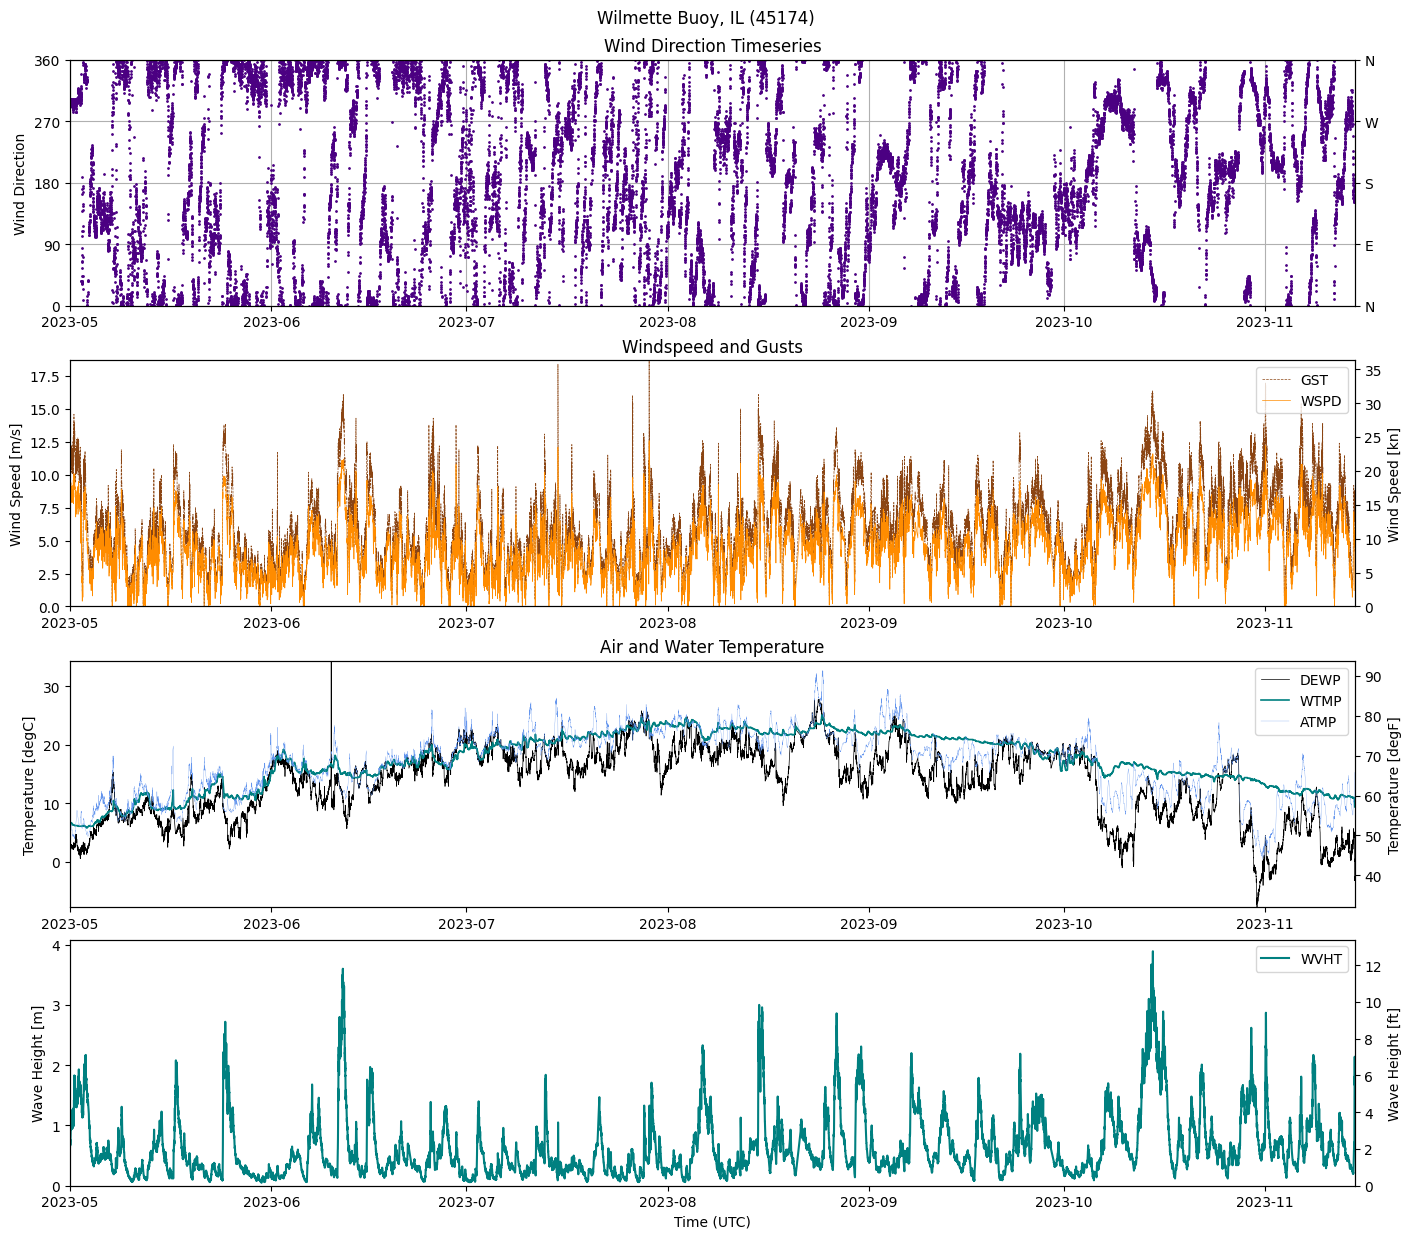

In [44]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

pad = 1.05
my_ytick_labels=['N','E','S','W','N']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), constrained_layout=True)
fig.suptitle(StationName + " (45174)",y=1.02)

ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()

ax1.grid(True)
ax1.axis([df.first_valid_index(),df.last_valid_index(),0,360])
major_angle_ticks = np.arange(0,361,90)
ax1.set_yticks(major_angle_ticks)
ax1b.set_yticks(major_angle_ticks)
ax1.plot(df.index, df['WDIR'], 
         color='indigo',
         linestyle='none',
         marker='o',
         markersize=1,
         linewidth=1)
ax1.set_ylabel('Wind Direction')
ax1b.set_yticks(ticks=major_angle_ticks,labels=my_ytick_labels)
#ax1.set_xlabel('Time (UTC)')
ax1.set_title('Wind Direction Timeseries')

# Wind speed, gust, direction
ax2.axis([df.first_valid_index(),df.last_valid_index(),0,df['GST'].max()])
ax2b.axis([df.first_valid_index(),df.last_valid_index(),0,1.9438*df['GST'].max()])

ax2.plot(df.index, df['GST'], 
         color='saddlebrown',  
         linewidth=0.5,
         linestyle='--',
         label='GST')
ax2.plot(df.index, df['WSPD'], 
         color='darkorange',
          linewidth=0.5,
          label='WSPD')

ax2.set_title('Windspeed and Gusts')
ax2.set_ylabel('Wind Speed [m/s]')
ax2b.set_ylabel('Wind Speed [kn]')
ax2.legend(loc='upper right')


# Water temperature

ax3.axis([df.first_valid_index(),df.last_valid_index(),df['DEWP'].min(),pad*df['ATMP'].max()])
ax3b.axis([df.first_valid_index(),df.last_valid_index(),32,pad*9*df['ATMP'].max()/5 +32])
ax3.plot(df.index, df['DEWP'],  
         linewidth=0.5,
         color='black',
         label='DEWP')
ax3.plot(df.index, df['WTMP'],  
         linewidth=1.2,
         color='teal',
         label='WTMP')
ax3.plot(df.index, df['ATMP'], 
         linewidth=0.2,
         color='cornflowerblue',
         label='ATMP')
ax3.set_ylabel('Temperature [degC]')
ax3b.set_ylabel('Temperature [degF]')
ax3.legend(loc='upper right')
ax3.set_title('Air and Water Temperature')


ax4.axis( [df.first_valid_index(),df.last_valid_index(),0,pad*df['WVHT'].max()])
ax4b.axis([df.first_valid_index(),df.last_valid_index(),0,pad*3.28*df['WVHT'].max()])
ax4.plot(df.index, df['WVHT'],  
         linewidth=1.5,
         color='teal',
         label='WVHT')
ax4.set_ylabel('Wave Height [m]')
ax4b.set_ylabel('Wave Height [ft]')
ax4.legend(loc='upper right')
ax4.set_xlabel('Time (UTC)')

#plt.savefig('images/buoyplots.pdf')
plt.show()

Text(0.5, 1.02, 'Wilmette Buoy, IL (45174)')

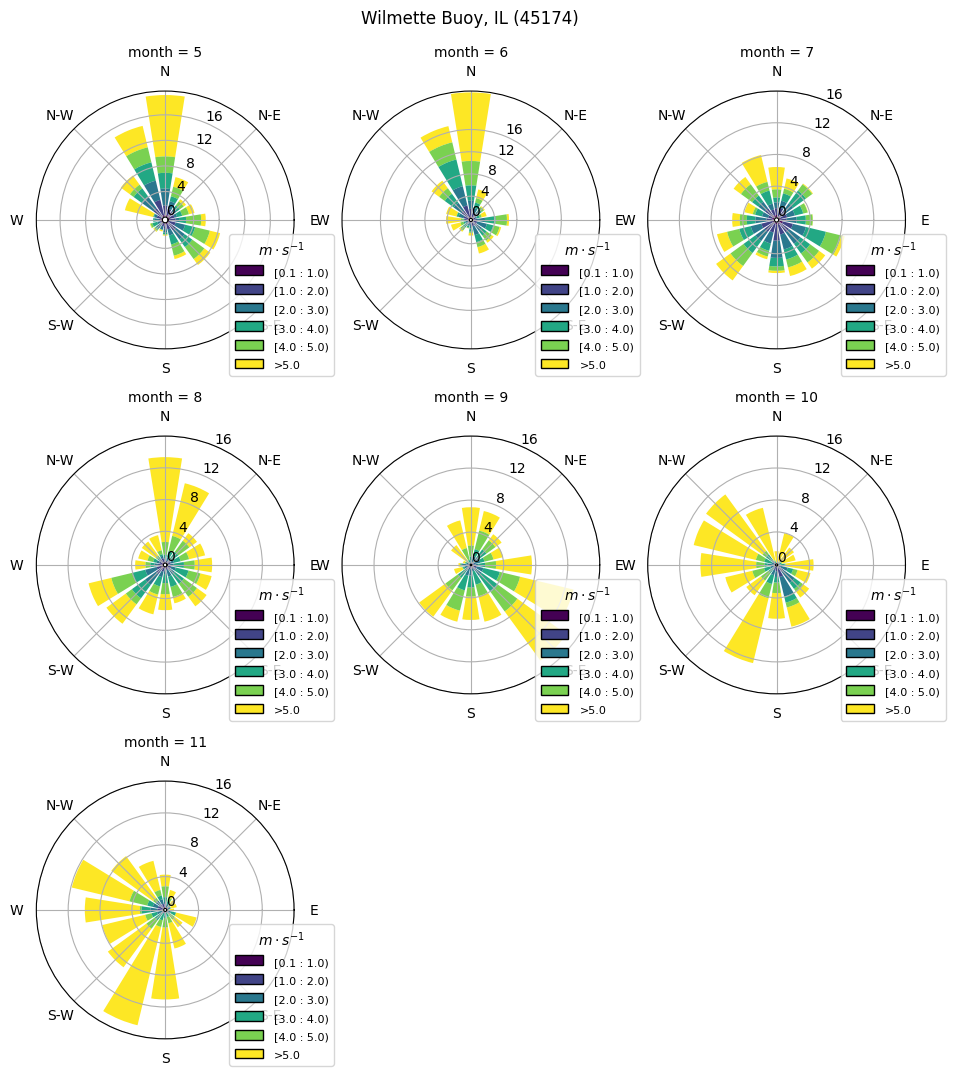

In [47]:
# From the example scripts in https://windrose.readthedocs.io/en/latest/usage.html

from windrose import WindroseAxes, plot_windrose
import seaborn as sns

def plot_windrose_subplots(data, *, direction, var, color=None, **kwargs):
    """wrapper function to create subplots per axis"""
    ax = plt.gca()
    ax = WindroseAxes.from_ax(ax=ax)
    plot_windrose(direction_or_df=data[direction], var=data[var], ax=ax, **kwargs)

df = df.rename(columns={'MM': 'month'})

g = sns.FacetGrid(
    data=df,
    # the column name for each level a subplot should be created
    col="month",
    # place a maximum of 3 plots per row
    col_wrap=3,
    subplot_kws={"projection": "windrose"},
    sharex=False,
    sharey=False,
    despine=False,
    height=3.5,
)

g.map_dataframe(
    plot_windrose_subplots,
    direction="WDIR",
    var="WSPD",
    normed=True,
    # manually set bins, so they match for each subplot
    bins=(0.1, 1, 2, 3, 4, 5),
    calm_limit=0.1,
    kind="bar",
)

# make the subplots easier to compare, by having the same y-axis range
y_ticks = range(0, 17, 4)
for ax in g.axes:
    ax.set_legend(
        title="$m \cdot s^{-1}$", bbox_to_anchor=(1.15, -0.1), loc="lower right"
    )
    ax.set_rgrids(y_ticks, y_ticks)

# adjust the spacing between the subplots to have sufficient space between plots
plt.subplots_adjust(wspace=-0.2)
plt.suptitle(StationName + " (45174)",y=1.02)

Historical Radiation Data

In [48]:

def get_hrdata(station,year):
    
    url = 'https://www.ndbc.noaa.gov/data/historical/srad/' + station.lower() + 'r' + str(year) + '.txt.gz'
    print(url)
    df = pd.read_table(url,sep = "\s+",compression='gzip',low_memory=False)
  
    # Wrangle the Buoy Data
    units = df.loc[0]
    df.drop(df.index[0], inplace=True)
    # Set the column types
    df['#YY'] = df['#YY'].astype(int)
    df['MM'] = df['MM'].astype(int)
    df['DD'] = df['DD'].astype(int)
    df['hh'] = df['hh'].astype(int)
    df['mm'] = df['mm'].astype(int)
    if 'SRAD1' in df.columns:
        df['SRAD1'] = pd.to_numeric(df['SRAD1'], errors='coerce')
    if 'SWRAD' in df.columns:
        df['SWRAD'] = pd.to_numeric(df['SWRAD'], errors='coerce')
    if 'LWRAD' in df.columns:
        df['LWRAD'] = pd.to_numeric(df['LWRAD'], errors='coerce')

    df['datetime'] = pd.to_datetime(dict(year=df['#YY'], month=df.MM,  day = df.DD, hour=df.hh, minute=df.mm))
    df.set_index('datetime',inplace=True)

# NDBC uses these numerical values to indicate that no data was taken

    df['SRAD1'] = df['SRAD1'].replace({9999.0: np.nan})
    df['SWRAD'] = df['SWRAD'].replace({9999.0: np.nan})
    df['LWRAD'] = df['LWRAD'].replace({9999.0: np.nan})
    
    return (df)


In [47]:
df = get_hrdata('OKSI2',2023) 
StationName = slm_buoys.loc[slm_buoys['id'] == 'oksi2','name'].iloc[0]
print(StationName)
print(df.head())

https://www.ndbc.noaa.gov/data/historical/srad/oksi2r2023.txt.gz
Oak St., Chicago, IL
                      #YY  MM  DD  hh  mm  SRAD1  SWRAD  LWRAD
datetime                                                      
2023-01-01 00:00:00  2023   1   1   0   0    2.0    NaN    NaN
2023-01-01 01:00:00  2023   1   1   1   0    2.0    NaN    NaN
2023-01-01 02:00:00  2023   1   1   2   0    2.0    NaN    NaN
2023-01-01 03:00:00  2023   1   1   3   0    2.0    NaN    NaN
2023-01-01 04:00:00  2023   1   1   4   0    2.0    NaN    NaN


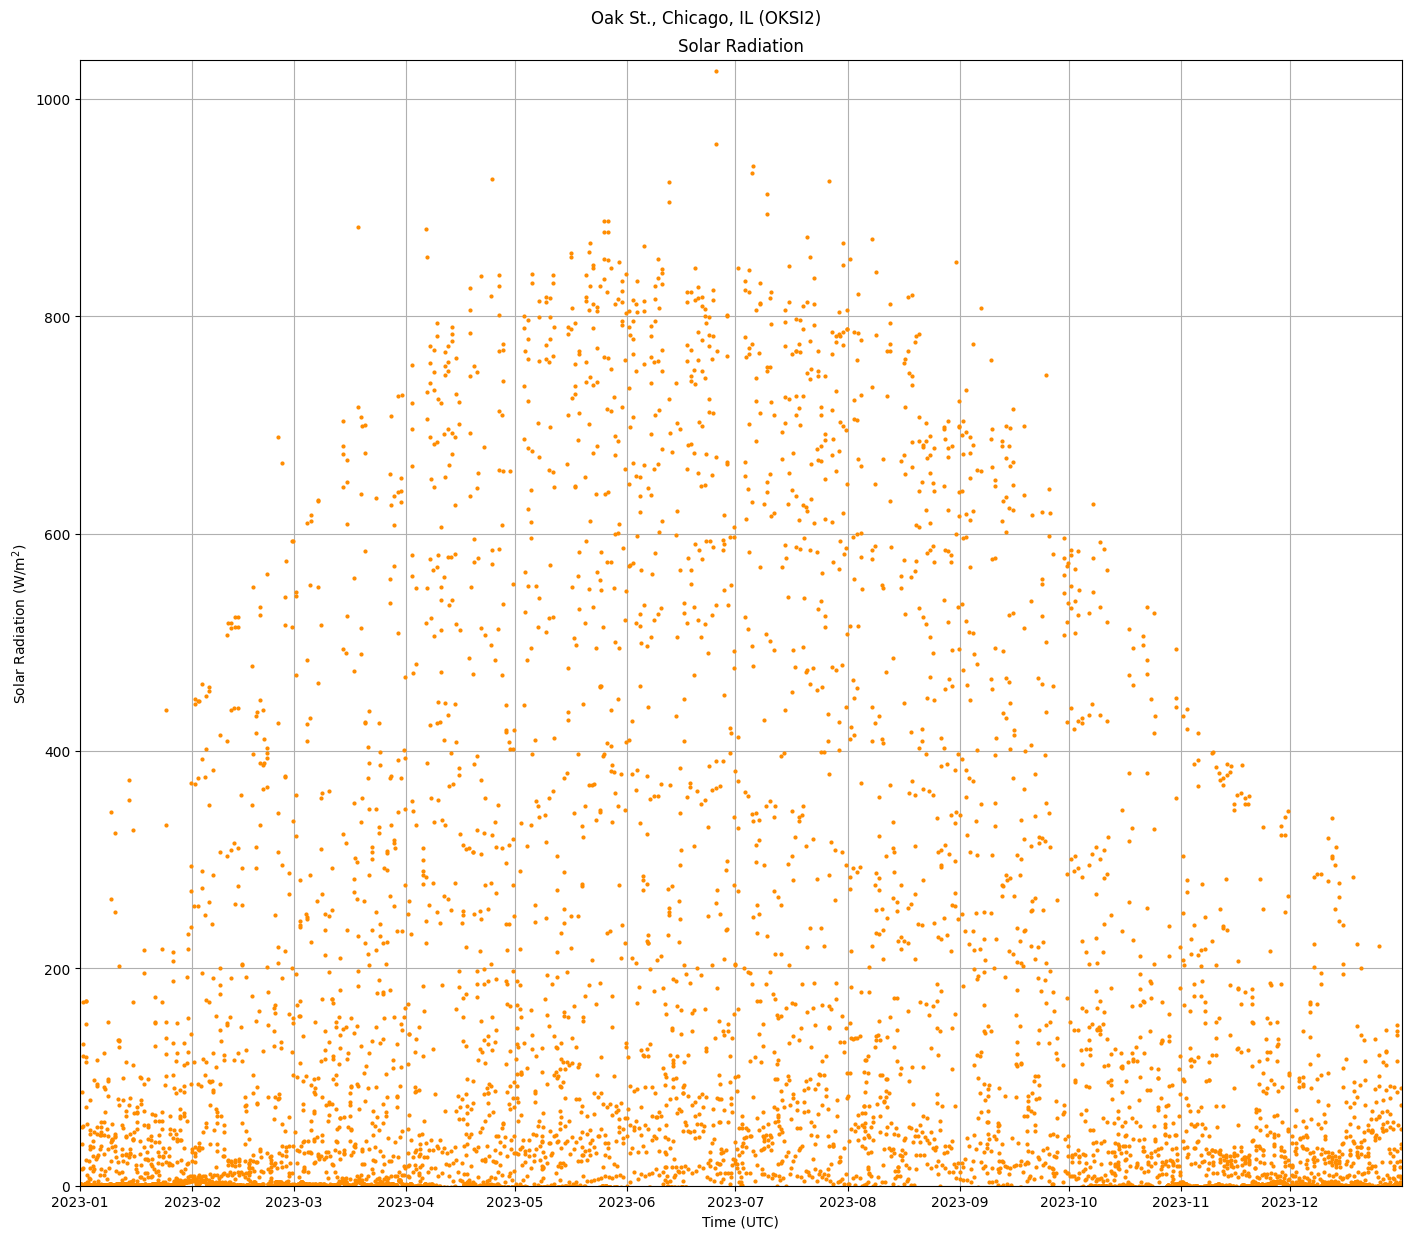

In [48]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

pad = 1.01

fig, ax1 = plt.subplots(1, 1, figsize=(14, 12), constrained_layout=True)
fig.suptitle(StationName + " (OKSI2)",y=1.02)

ax1.grid(True)
ax1.axis([df.first_valid_index(),df.last_valid_index(),0,pad*df['SRAD1'].max()])
ax1.plot(df.index, df['SRAD1'], 
         color=mcolors.CSS4_COLORS['darkorange'],
         linestyle='none',
         marker='o',
         markersize=2,
         linewidth=1)
ax1.set_ylabel('Solar Radiation (W/m${}^2$)')
ax1.set_xlabel('Time (UTC)')
ax1.set_title('Solar Radiation')

plt.show()

## Python APIs for the NDBC

Thare are several python packages that serve as APIs for the NBDC including:

- [Siphon](https://unidata.github.io/siphon/latest/examples/ndbc/buoy_type_request.html) a collection of Python utilities for downloading data from remote data services. This unidata packages has good search functions, but data retrieval is only implemented for realtime data. See also
https://notebook.community/ocefpaf/notebooks_demos/notebooks/staged_noteooks/SIPHON_NCSS_HFR_DataAccess.


- [ndbc-api](https://github.com/cdjellen/ndbc-api), this Github also contains [Example Notebook](https://github.com/CDJellen/ndbc-api/blob/main/notebooks/overview.ipynb). ndbc-api also has a [PyPi Repository](https://pypi.org/project/ndbc-api/). The station search methods in ndbc_api return very incomplete results. In particular, as of February 2024, the stations() method currently returns 146  out of 1323 stations, and nearest_station() method seems restricted to that subset.  The ndbc_api methods which access station data and metadata seem to work for the complete set of buoy's provided you have the five digit station identifier. Those methods are.

    - station() which returns station metadata
    - available_realtime() which can return data from the last 45 days
    - available_historical() which returns older data.

- [NDBC](https://pypi.org/project/NDBC/)
- [seebuoy](https://github.com/nickc1/seebuoy)

### Simphon Examples

In [ ]:
from siphon.simplewebservice.ndbc import NDBC
df2 = NDBC.realtime_observations('CHII2')
df2.head()

data_aval = NDBC.buoy_dta_types('CHII2')

,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,air_temperature,water_temperature,dewpoint,visibility,3hr_pressure_tendency,water_level_above_mean,time
0,160.0,3.6,4.1,NaN,NaN,NaN,NaN,NaN,5.6,NaN,-3.5,NaN,NaN,NaN,2024-03-01 20:20:00+00:00
1,160.0,3.6,3.6,NaN,NaN,NaN,NaN,NaN,5.3,NaN,-3.5,NaN,NaN,NaN,2024-03-01 20:10:00+00:00
2,150.0,4.1,4.6,NaN,NaN,NaN,NaN,NaN,5.2,NaN,-3.5,NaN,NaN,NaN,2024-03-01 20:00:00+00:00
3,130.0,4.6,4.6,NaN,NaN,NaN,NaN,NaN,5.4,NaN,-4.6,NaN,NaN,NaN,2024-03-01 19:50:00+00:00
4,140.0,3.1,3.6,NaN,NaN,NaN,NaN,NaN,5.5,NaN,-5.1,NaN,NaN,NaN,2024-03-01 19:40:00+00:00


#### ndbc-api examples

Install ndbc-api in a terminal window using PIP

`pip install ndbc-api`

In [42]:
from ndbc_api import NdbcApi 
api = NdbcApi()

Obtain station meta data

In [ ]:
for x in station_list:
 print(api.station(station_id=x,as_df=True))

                                                                   0
Water depth                                                   20.7 m
Sea temp depth                                  1 m below water line
Anemometer height                           3 m above site elevation
Air temp height                             3 m above site elevation
Site elevation                            176 m above mean sea level
Location                 41.982 N 86.619 W (41°58'55" N 86°37'10" W)
Statation Type              Owned and maintained by Limno Tech, Buoy
Name               Station 45026  - Cook Nuclear Plant Buoy, Stev...
                                                             0
Water depth                                             20.4 m
Sea temp depth                            1 m below water line
Anemometer height                     3 m above site elevation
Air temp height                       3 m above site elevation
Site elevation                      177 m above mean sea level
L

Inspect historically available data for a particular buoy

In [ ]:
api.available_historical(station_id="45174")

What current data is available?

In [ ]:
api.available_realtime(station_id="45007")

{'Data for last 24 hours: No data available.': {},
 'Data for last 5 days: No data available.': {},
 'Data for last 45 days: No data available.': {}}

In [41]:
meta_df = api.station(station_id="45174",as_df=True)
meta_dic = api.station(station_id="45174",as_df=False)

display(meta_df)
print(meta_df)

display(meta_dic)
print(meta_dic["Name"])

,0
Sea temp depth,1 m below water line
Barometer elevation,3 m above mean sea level
Anemometer height,3 m above site elevation
Air temp height,3 m above site elevation
Site elevation,176 m above mean sea level
Location,"42.135 N 87.655 W (42°8'6"" N 87°39'18"" W)"
Statation Type,Owned and maintained by Illinois-Indiana Sea G...
Name,"Station 45174 - Wilmette Buoy, IL"


                                                                     0
Sea temp depth                                    1 m below water line
Barometer elevation                           3 m above mean sea level
Anemometer height                             3 m above site elevation
Air temp height                               3 m above site elevation
Site elevation                              176 m above mean sea level
Location                     42.135 N 87.655 W (42°8'6" N 87°39'18" W)
Statation Type       Owned and maintained by Illinois-Indiana Sea G...
Name                                Station 45174  - Wilmette Buoy, IL


{'Sea temp depth': '1 m below water line',
 'Barometer elevation': '3 m above mean sea level',
 'Anemometer height': '3 m above site elevation',
 'Air temp height': '3 m above site elevation',
 'Site elevation': '176 m above mean sea level',
 'Location': '42.135 N 87.655 W (42°8\'6" N 87°39\'18" W)',
 'Statation Type': 'Owned and maintained by Illinois-Indiana Sea Grant, Buoy',
 'Name': 'Station 45174  - Wilmette Buoy, IL'}

Station 45174  - Wilmette Buoy, IL


In [43]:
year = 2023
start_dt = dt.datetime(year,4,15)
end_dt = dt.datetime(year,10,31)
df_meta = api.station(station_id="45174",as_df=False)

df = api.get_data(
    station_id='45174',
    mode='stdmet',
    start_time=start_dt,
    end_time=end_dt,
    as_df=True
)

print(df.head())

                      WDIR  WSPD   GST  WVHT   DPD  APD    MWD   PRES  ATMP  \
timestamp                                                                     
2023-05-01 00:00:00  291.0   8.4  11.3  0.65  3.04  NaN  326.0  995.6   6.1   
2023-05-01 00:10:00  293.0   8.4  11.1  0.70  3.06  NaN  328.0  995.7   6.1   
2023-05-01 00:20:00  295.0   8.1  11.2  0.75  3.12  NaN  322.0  995.7   6.1   
2023-05-01 00:30:00  299.0   7.6   9.3  0.77  3.12  NaN  179.0  995.7   6.0   
2023-05-01 00:40:00  294.0   7.4  10.6  0.76  3.14  NaN  335.0  995.7   5.9   

                     WTMP  DEWP  VIS  TIDE  
timestamp                                   
2023-05-01 00:00:00   6.8   2.9  NaN   NaN  
2023-05-01 00:10:00   6.8   4.0  NaN   NaN  
2023-05-01 00:20:00   6.8   3.2  NaN   NaN  
2023-05-01 00:30:00   6.8   3.4  NaN   NaN  
2023-05-01 00:40:00   6.8   3.4  NaN   NaN  
